In [12]:
import mdtraj as md
import numpy as np
import time
import datetime
import sys
sys.path.insert(1, '/home/adria/scripts/lammps/utils/')
import conversion
import matplotlib.pyplot as plt
import os

In [13]:
def find_rg(traj, topo=None):
    if topo is None:
        conversion.getPDBfromLAMMPS(os.path.join(os.path.dirname(traj), 'hps'))
        topo = os.path.join(os.path.dirname(traj), 'hps_trj.pdb')
    ti = time.time()
    traj = md.load_lammpstrj(traj, top=topo)
    rg = md.compute_rg(traj)
    print(f'Time expended : {datetime.timedelta(seconds=time.time()-ti)}')
    return traj, rg

In [14]:
xtcd4 = '/home/adria/perdiux/prod/lammps/dignon/cpeb4d4/A-syn_HPS_100000_frames.atom'

trajd4, rgd4 = find_rg(xtcd4)

Time expended : 0:01:55.736333


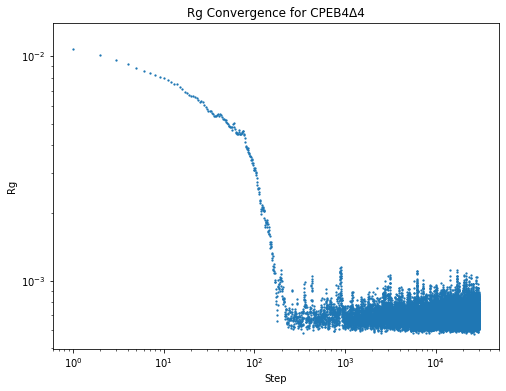

In [18]:
plt.figure(num=None, figsize=(8,6))
plt.xlabel("Step")
plt.ylabel("Rg")
plt.title("Rg Convergence for CPEB4\u03944")
plt.loglog(rgd4, ".", ms=2.5);

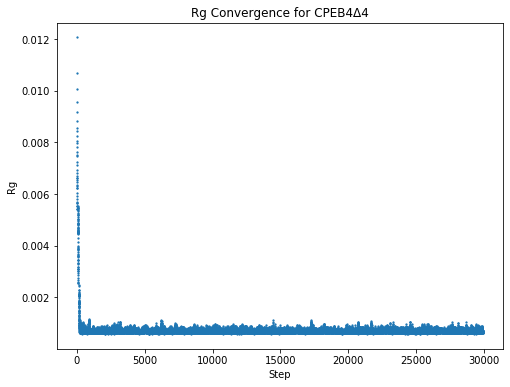

In [31]:
plt.figure(num=None, figsize=(8,6))
plt.xlabel("Step")
plt.ylabel("Rg")
plt.title("Rg Convergence for CPEB4\u03944")
plt.plot(rgd4, ".", ms=2.5);

In [28]:
nrg = '/home/adria/perdiux/prod/lammps/dignon/cpeb4d4/obs.data'
dat = np.genfromtxt(nrg)
steps = dat[:,0]
kinE = dat[:,2]
potE = dat[:,1]

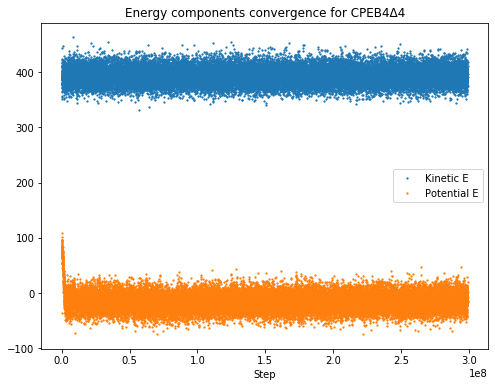

In [30]:
plt.figure(num=None, figsize=(8,6))
plt.xlabel("Step")
plt.title("Energy components convergence for CPEB4\u03944")
plt.plot(steps, kinE, ".", ms=2.5, label="Kinetic E");
plt.plot(steps, potE, ".", ms=2.5, label="Potential E");
plt.legend();